<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Number-of-sequences" data-toc-modified-id="Number-of-sequences-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Number of sequences</a></span></li><li><span><a href="#Taxonomy" data-toc-modified-id="Taxonomy-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Taxonomy</a></span></li><li><span><a href="#Annotations" data-toc-modified-id="Annotations-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Annotations</a></span><ul class="toc-item"><li><span><a href="#COG-functional-categories" data-toc-modified-id="COG-functional-categories-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>COG functional categories</a></span><ul class="toc-item"><li><span><a href="#Grouped-by-taxonomy" data-toc-modified-id="Grouped-by-taxonomy-5.3.1.1"><span class="toc-item-num">5.3.1.1&nbsp;&nbsp;</span>Grouped by taxonomy</a></span></li></ul></li></ul></li><li><span><a href="#humann2-db-genes" data-toc-modified-id="humann2-db-genes-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>humann2 db genes</a></span><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-5.4.1"><span class="toc-item-num">5.4.1&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#By-Taxonomy" data-toc-modified-id="By-Taxonomy-5.4.1.1"><span class="toc-item-num">5.4.1.1&nbsp;&nbsp;</span>By Taxonomy</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Summarize LLMGAG results for all per-host-class runs

# Var

In [1]:
work_dir = '/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/LLMGAG_summary/'

# samples
samples_file = '/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/samples_cov-gte0.3.tsv'
# metadata
metadata_file = '/ebio/abt3_projects/Georg_animal_feces/data/mapping/unified_metadata_complete_190529.tsv'

# assembly output directories
base_out_dir = '/ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/'
out_dirs = c('MG_assembly_act', 'MG_assembly_amp', 'MG_assembly_rep', 'MG_assembly_ave', 'MG_assembly_mam')


In [3]:
# params
threads = 24

# Init

In [12]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(dtplyr)
library(data.table)
library(doParallel)
library(LeyLabRMisc)

In [5]:
make_dir(work_dir)
df.dims()

Created directory: /ebio/abt3_projects/databases_no-backup/animal_gut_metagenomes/wOutVertebrata/LLMGAG_summary/ 


# Load

In [6]:
meta = read.delim(metadata_file, sep='\t') %>%
    dplyr::select(SampleID, class, order, family, genus, scientific_name, diet, habitat)
meta 

SampleID,class,order,family,genus,scientific_name,diet,habitat
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
F14_Common_Bream,Actinopterygii,Cypriniformes,Cyprinidae,Abramis,Abramis_brama,omnivore,aquatic habitat
F35_Red_Deer,Mammalia,Artiodactyla,Cervidae,Cervus,Cervus_elaphus,herbivore,terrestrial habitat
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X189_fail_Rainbow_Trout,Actinopterygii,Salmoniformes,Salmonidae,Oncorhynchus,Oncorhynchus_mykiss,carnivore,aquatic habitat
X232_fail_Brown_Trout,Actinopterygii,Salmoniformes,Salmonidae,Salmo,Salmo_trutta,carnivore,aquatic habitat


# Summary

## Number of sequences

In [7]:
# raw assembled sequences
n_raw_seqs = list()
for(D in out_dirs){
    F = file.path(base_out_dir, D, 'LLMGAG', 'assembly', 'plass', 'genes.faa')
    cmd = glue::glue('grep -c ">" {fasta}', fasta=F)
    n_raw_seqs[[D]] = as.numeric(system(cmd, intern=TRUE))
    cat('Directory:', D, '\n')
    cat('Number of assembled sequences:', n_raw_seqs[[D]], '\n\n')
}

Directory: MG_assembly_act 
Number of assembled sequences: 13293278 

Directory: MG_assembly_amp 
Number of assembled sequences: 3355557 

Directory: MG_assembly_rep 
Number of assembled sequences: 10866795 

Directory: MG_assembly_ave 
Number of assembled sequences: 53270560 

Directory: MG_assembly_mam 
Number of assembled sequences: 201061420 



In [8]:
# clusterd seqs
n_clust_seqs = list()
for(D in out_dirs){
    F = file.path(base_out_dir, D, 'LLMGAG', 'cluster', 'linclust', 'clusters_rep-seqs.faa')
    cmd = glue::glue('grep -c ">" {fasta}', fasta=F)
    n_clust_seqs[[D]] = as.numeric(system(cmd, intern=TRUE))
    cat('Directory:', D, '\n')
    cat('Number of cluster rep sequences:', n_clust_seqs[[D]], '\n\n')
}

Directory: MG_assembly_act 
Number of cluster rep sequences: 6970073 

Directory: MG_assembly_amp 
Number of cluster rep sequences: 2159403 

Directory: MG_assembly_rep 
Number of cluster rep sequences: 5965461 

Directory: MG_assembly_ave 
Number of cluster rep sequences: 6970073 

Directory: MG_assembly_mam 
Number of cluster rep sequences: 6970073 



In [9]:
# humann2-db formatted clusters
n_h2_seqs = list()
for(D in out_dirs){
    F = file.path(base_out_dir, D, 'LLMGAG', 'humann2_db', 'clusters_rep-seqs.faa.gz')
    cmd = glue::glue('gunzip -c {fasta} | grep -c ">"', fasta=F)
    n_h2_seqs[[D]] = as.numeric(system(cmd, intern=TRUE))
    cat('Directory:', D, '\n')
    cat('Number of humann2_db-formatted seqs:', n_h2_seqs[[D]], '\n')
}

Directory: MG_assembly_act 
Number of humann2_db-formatted seqs: 932184 
Directory: MG_assembly_amp 
Number of humann2_db-formatted seqs: 86254 
Directory: MG_assembly_rep 
Number of humann2_db-formatted seqs: 662667 
Directory: MG_assembly_ave 
Number of humann2_db-formatted seqs: 1648787 
Directory: MG_assembly_mam 
Number of humann2_db-formatted seqs: 1252033 


In [10]:
cat('Number of assembled sequences:', n_raw_seqs %>% unlist %>% sum, '\n')
cat('Number of cluster rep sequences:', n_clust_seqs %>% unlist %>% sum, '\n')
cat('Number of humann2_db-formatted seqs:', n_h2_seqs %>% unlist %>% sum, '\n')

Number of assembled sequences: 281847610 
Number of cluster rep sequences: 29035083 
Number of humann2_db-formatted seqs: 4581925 


## Taxonomy

In [11]:
read_tax = function(D, base_dir){
    # reading in taxonomy table
    ## WARING: slow
    F = file.path(base_dir, D, 'LLMGAG', 'taxonomy', 'clusters_rep-seqs_tax_db.tsv.gz')
    cmd = glue::glue('gunzip -c {file}', file=F) 
    coln = c('seqID', 'taxID', 'rank', 'spp', 'lineage')
    levs = c('Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species')
    tax = fread(cmd=cmd, sep='\t', header=FALSE, col.names=coln, fill=TRUE) %>%
        separate(lineage, levs, sep=':') 
    tax$D = D
    tax = tax %>%
        mutate(D = case_when(
            D == "MG_assembly_act" ~ 'Actinopterygii',
            D == "MG_assembly_amp" ~ 'Amphibia',
            D == "MG_assembly_rep" ~ 'Reptilia',
            D == "MG_assembly_ave" ~ 'Aves',
            D == "MG_assembly_mam" ~ 'Mammalia'
        ))
    return(tax)
}

doParallel::registerDoParallel(threads)
tax = plyr::llply(as.list(out_dirs), read_tax, base_dir=base_out_dir, .parallel=TRUE) %>%
    do.call(rbind, .) %>%
    lazy_dt 
tax

seqID,taxID,rank,spp,Domain,Phylum,Class,Order,Family,Genus,Species,D
<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
107b7f2ae8274fa186196ceeb638eef1,0,no rank,unclassified,,NA,NA,NA,NA,NA,NA,Actinopterygii
0fcdf80ad1b94a999e95f1854999315c,0,no rank,unclassified,,NA,NA,NA,NA,NA,NA,Actinopterygii
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
61a45112c0c44ac48be59f1d3f741fe4,0,no rank,unclassified,,NA,NA,NA,NA,NA,NA,Mammalia
333ad636013a41a69476d031a854a763,0,no rank,unclassified,,NA,NA,NA,NA,NA,NA,Mammalia


In [6]:
# summarizing taxonomy
tax_s = tax %>%
    filter(Domain != '',
           Phylum != '') %>%
    group_by(D, Domain, Phylum) %>%
    summarize(n = seqID %>% unique %>% length) %>%
    group_by(Domain, Phylum) %>%
    mutate(n_total = n %>% sum(na.rm=TRUE)) %>%
    ungroup()
 
tax_s %>% dfhead

[1] 1003    5


D,Domain,Phylum,n,n_total
Actinopterygii,Fungi,Ascomycota,22429,212851
Actinopterygii,Fungi,Basidiomycota,1348,10939
Actinopterygii,Fungi,Blastocladiomycota,45,110


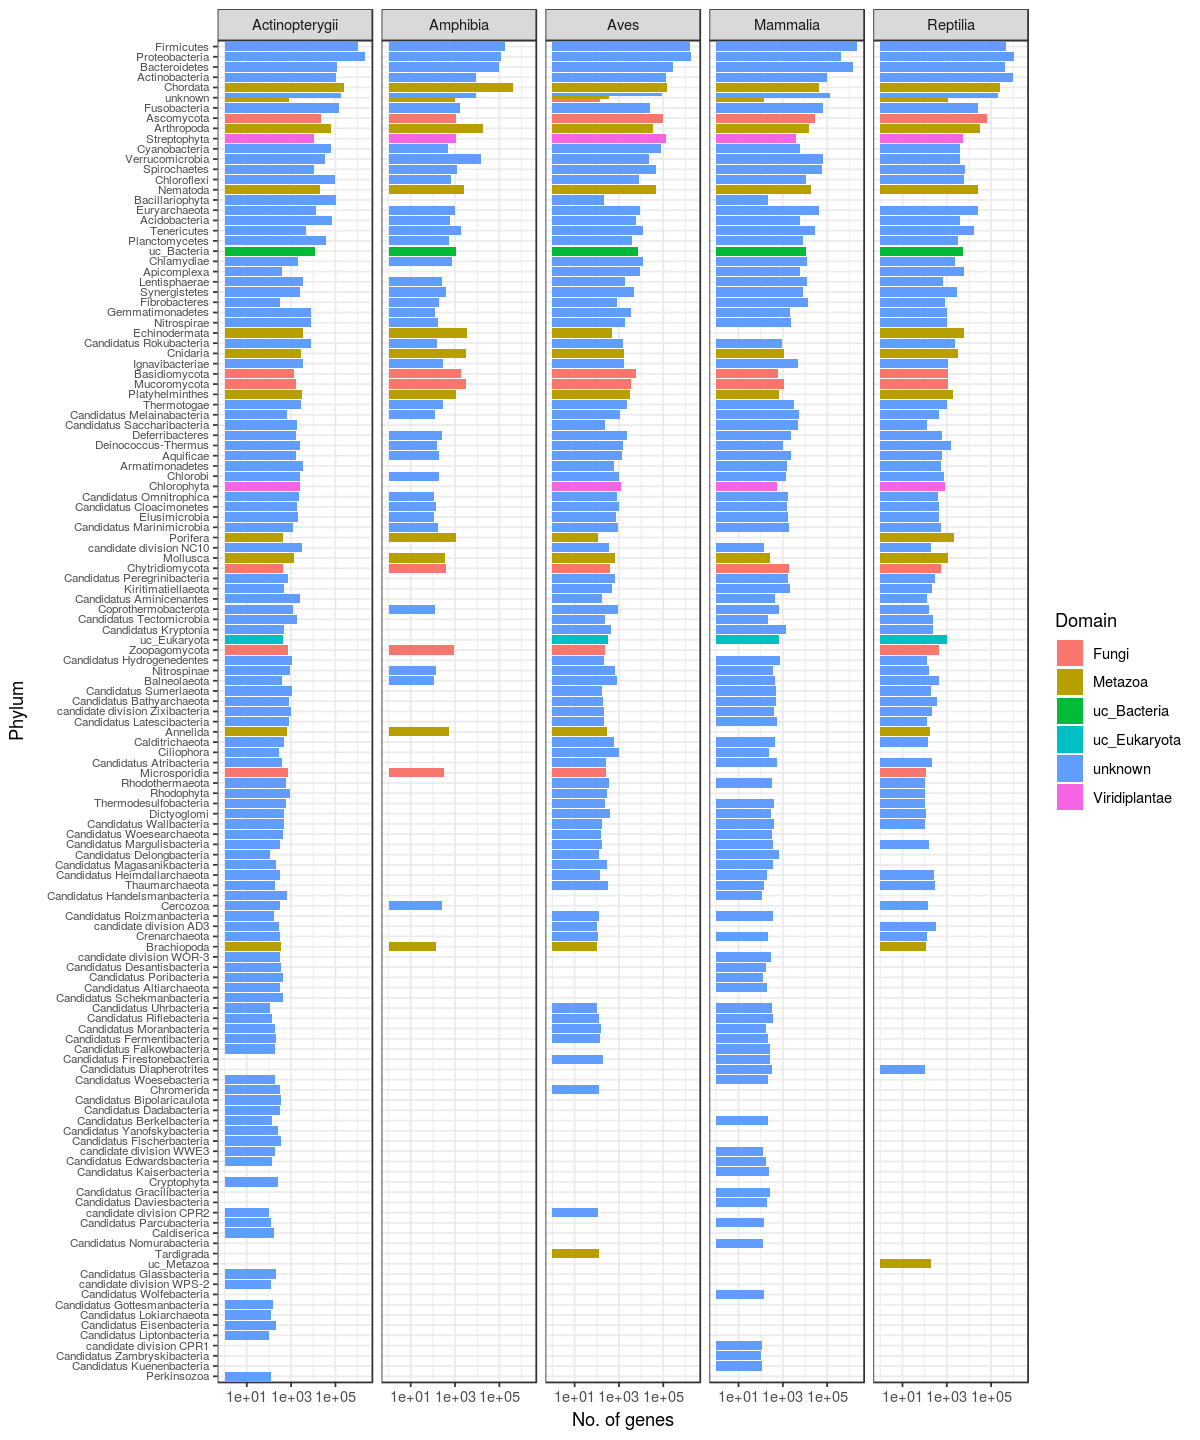

In [7]:
# plotting by phylum
p = tax_s %>%
    filter(n > 100) %>%
    mutate(Phylum = Phylum %>% reorder(n_total)) %>%
    ggplot(aes(Phylum, n, fill=Domain)) +
    geom_bar(stat='identity', position='dodge') +
    scale_y_log10() +
    facet_grid(. ~ D) +
    labs(y = 'No. of genes') +
    coord_flip() +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=7)
    )

dims(10,12)
plot(p)

In [8]:
# top phyla
tax_s %>% 
    group_by(Domain, Phylum) %>%
    summarize(n_total = n %>% sum(na.rm=TRUE)) %>%
    ungroup() %>%
    arrange(-n_total) %>%
    head(n=30)

Domain,Phylum,n_total
unknown,Firmicutes,5400059
unknown,Proteobacteria,5381556
unknown,Bacteroidetes,2338905
unknown,Actinobacteria,1274188
Metazoa,Chordata,1077136
unknown,unknown,606265
unknown,Fusobacteria,264076
Fungi,Ascomycota,212851
Metazoa,Arthropoda,162478
Viridiplantae,Streptophyta,155628


## Annotations

In [9]:
read_annot = function(D, base_dir){
    # reading in eggnog-mapper annotations
    ## WARING: slow
    F = file.path(base_dir, D, 'LLMGAG', 'annotate', 
                  'eggnog-mapper', 'clusters_rep-seqs.emapper.annotations.gz')
    cmd = glue::glue('gunzip -c {file}', file=F) 
    coln = c('seqID', 'taxID', 'rank', 'spp', 'lineage')
    levs = c('Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species')
    df = fread(cmd, sep='\t') %>%
        dplyr::select(-V6)
    df$D = D
    df = df %>%
        mutate(D = case_when(
            D == "MG_assembly_act" ~ 'Actinopterygii',
            D == "MG_assembly_amp" ~ 'Amphibia',
            D == "MG_assembly_rep" ~ 'Reptilia',
            D == "MG_assembly_ave" ~ 'Aves',
            D == "MG_assembly_mam" ~ 'Mammalia'
        ))
    return(df)
}

doParallel::registerDoParallel(threads)
emap_annot = plyr::llply(as.list(out_dirs), read_annot, base_dir=base_out_dir, .parallel=TRUE) %>%
    do.call(rbind, .)
emap_annot %>% dfhead

[1] 17293304       13


V1,V2,V3,V4,V5,V7,V8,V9,V10,V11,V12,V13,D
725dc59cef2b4834978b26de572e8f49,9615.ENSCAFP00000040900,3.0e-13,79.0,,,,euNOG[57],"0J1RQ@euNOG,0Y1YS@NOG",NA|NA|NA,,,Actinopterygii
0545f941e82342aba2181eeae2aa1e53,2850.Phatr49771,3.2e-38,163.7,FG08790.1,"K01116,K05857",,euNOG[57],"0XPXE@NOG,KOG1264@euNOG",NA|NA|NA,T,Phospholipase C gamma,Actinopterygii
e364447a2a934cec879b990cd0fecbde,83406.HDN1F_16000,5.5e-71,272.7,MAOC,"K14449,K18290",,bactNOG[38],"05DJG@bactNOG,0QSTK@gproNOG,16SWD@proNOG,COG2030@NOG",NA|NA|NA,I,Dehydratase,Actinopterygii


In [10]:
# adding taxonomy info
intersect(emap_annot$V1, tax$seqID) %>% length %>% print

emap_annot = emap_annot %>%
    left_join(tax, c('V1'='seqID', 'D'='D'))

emap_annot %>% dfhead

[1] 17293304
[1] 17293304       23


V1,V2,V3,V4,V5,V7,V8,V9,V10,V11,⋯,taxID,rank,spp,Domain,Phylum,Class,Order,Family,Genus,Species
725dc59cef2b4834978b26de572e8f49,9615.ENSCAFP00000040900,3.0e-13,79.0,,,,euNOG[57],"0J1RQ@euNOG,0Y1YS@NOG",NA|NA|NA,⋯,6192,species,Fasciola hepatica,Metazoa,Platyhelminthes,Trematoda,Plagiorchiida,Fasciolidae,Fasciola,Fasciola hepatica
0545f941e82342aba2181eeae2aa1e53,2850.Phatr49771,3.2e-38,163.7,FG08790.1,"K01116,K05857",,euNOG[57],"0XPXE@NOG,KOG1264@euNOG",NA|NA|NA,⋯,556484,no rank,Phaeodactylum tricornutum CCAP 1055/1,unknown,Bacillariophyta,Bacillariophyceae,Naviculales,Phaeodactylaceae,Phaeodactylum,Phaeodactylum tricornutum
e364447a2a934cec879b990cd0fecbde,83406.HDN1F_16000,5.5e-71,272.7,MAOC,"K14449,K18290",,bactNOG[38],"05DJG@bactNOG,0QSTK@gproNOG,16SWD@proNOG,COG2030@NOG",NA|NA|NA,⋯,929563,no rank,Leptonema illini DSM 21528,unknown,Spirochaetes,Spirochaetia,Leptospirales,Leptospiraceae,Leptonema,Leptonema illini


In [11]:
n_annot_seqs = emap_annot$V1 %>% unique %>% length
cat('Number of rep seqs with eggnog-mapper annotations:', n_annot_seqs, '\n')

Number of rep seqs with eggnog-mapper annotations: 17293304 


### COG functional categories

* [wiki on categories](https://ecoliwiki.org/colipedia/index.php/Clusters_of_Orthologous_Groups_%28COGs%29)

In [53]:
# summarizing by functional group
emap_annot_s = emap_annot %>%
    dplyr::select(V1, V12, D) %>%
    rename('class' = D) %>%
    separate(V12, LETTERS[1:6], sep=', ') %>%
    gather(X, COG_func_cat, -V1, -class) %>%
    filter(!is.na(COG_func_cat),
           COG_func_cat != '') %>%
    dplyr::select(-X) 

emap_annot_s %>% dfhead

Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 17293304 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”

[1] 16430502        3


V1,class,COG_func_cat
0545f941e82342aba2181eeae2aa1e53,Actinopterygii,T
e364447a2a934cec879b990cd0fecbde,Actinopterygii,I
00882b151d6a4eadb3c6d0a3d16c746e,Actinopterygii,L


In [54]:
# summary of gene cluster annotations
emap_annot_s$class %>% table

.
Actinopterygii       Amphibia           Aves       Mammalia       Reptilia 
       4097717         670744        4268132        4187244        3206665 

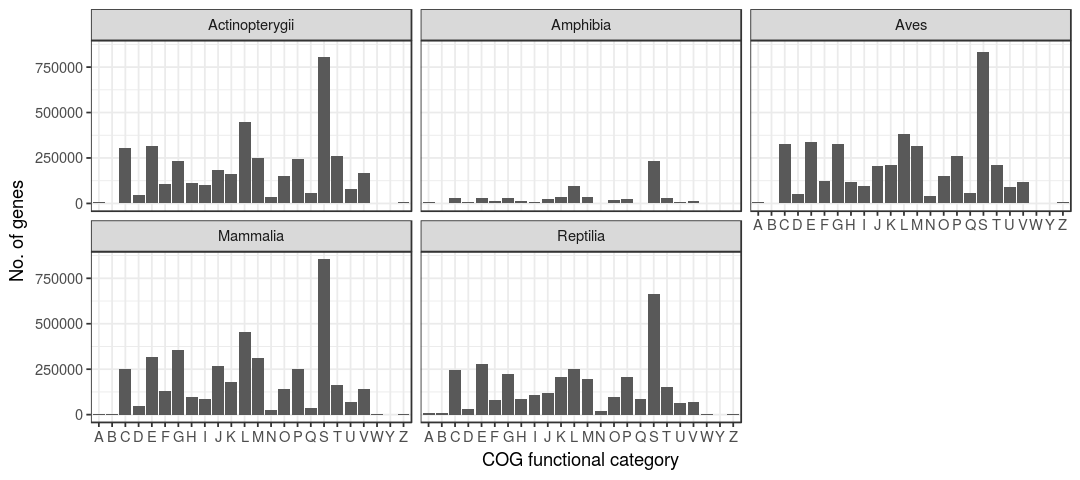

In [58]:
# plotting summary
p = emap_annot_s %>%
    ggplot(aes(COG_func_cat)) +
    geom_bar() +
    facet_wrap(~ class) +
    labs(x='COG functional category', y='No. of genes') +
    theme_bw()

dims(9,4)
plot(p)

#### Grouped by taxonomy

In [59]:
emap_annot_s = emap_annot %>%
    dplyr::select(V1, V12, D) %>%
    rename('class' = D) %>%
    separate(V12, LETTERS[1:6], sep=', ') %>%
    gather(X, COG_func_cat, -V1, -class) %>%
    left_join(tax, c('V1'='seqID')) %>%
    filter(!is.na(COG_func_cat),
           COG_func_cat != '') %>%
    dplyr::select(-X) 

emap_annot_s %>% dfhead

Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 17293304 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”

[1] 16430502       14


V1,class,COG_func_cat,taxID,rank,spp,Domain,Phylum,Class,Order,Family,Genus,Species,D
0545f941e82342aba2181eeae2aa1e53,Actinopterygii,T,556484,no rank,Phaeodactylum tricornutum CCAP 1055/1,unknown,Bacillariophyta,Bacillariophyceae,Naviculales,Phaeodactylaceae,Phaeodactylum,Phaeodactylum tricornutum,Actinopterygii
e364447a2a934cec879b990cd0fecbde,Actinopterygii,I,929563,no rank,Leptonema illini DSM 21528,unknown,Spirochaetes,Spirochaetia,Leptospirales,Leptospiraceae,Leptonema,Leptonema illini,Actinopterygii
00882b151d6a4eadb3c6d0a3d16c746e,Actinopterygii,L,104623,species,Serratia sp. ATCC 39006,unknown,Proteobacteria,Gammaproteobacteria,Enterobacterales,Yersiniaceae,Serratia,Serratia sp. ATCC 39006,Actinopterygii


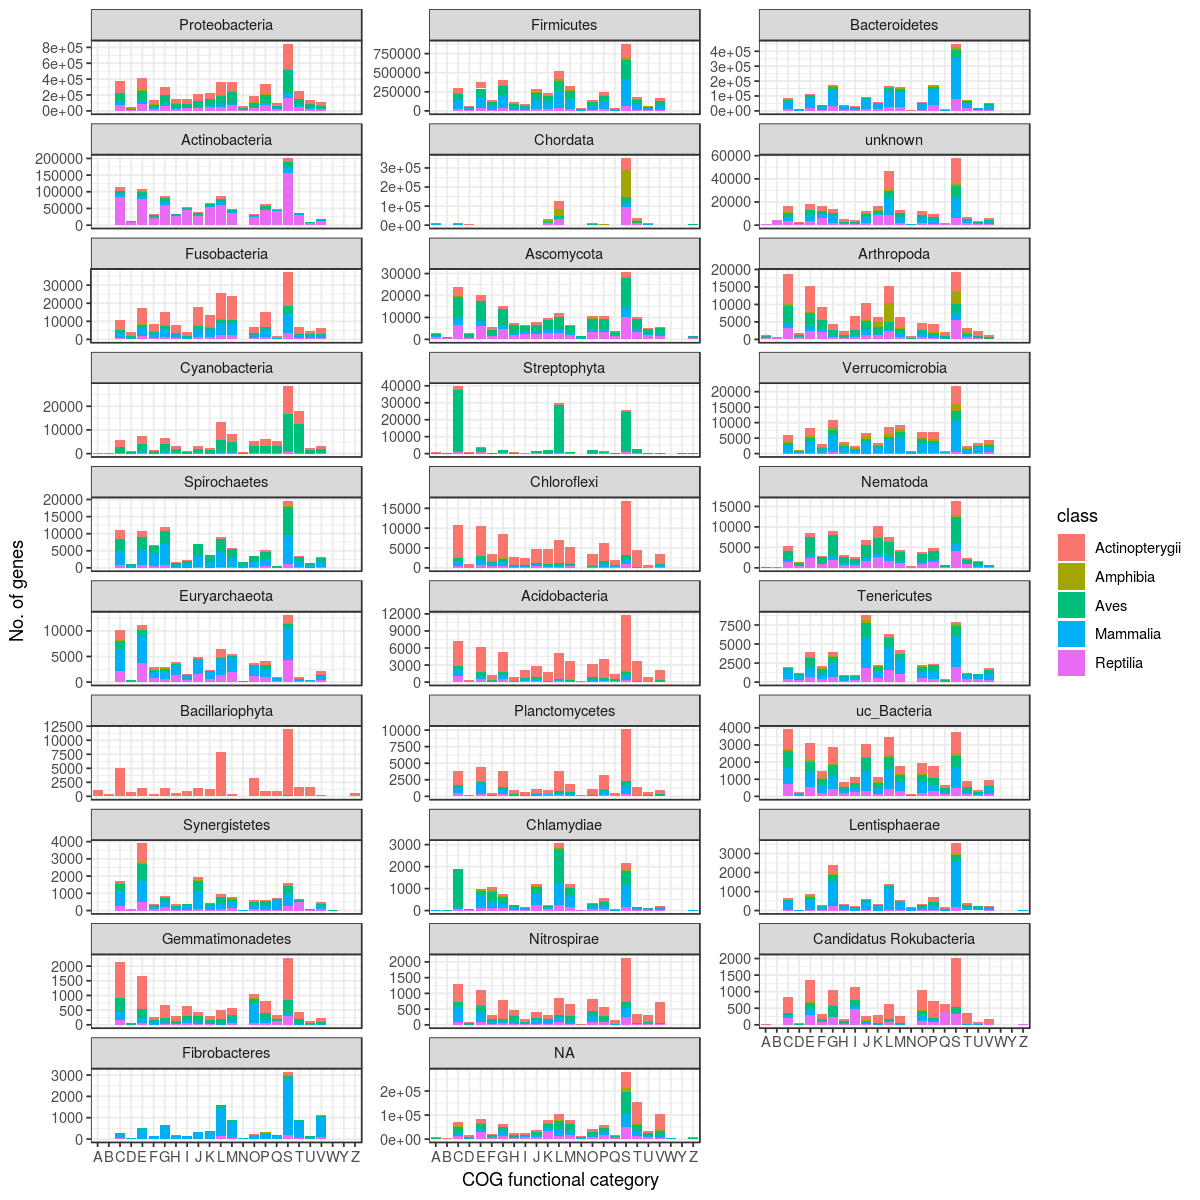

In [61]:
# plotting summary by phylum
p = emap_annot_s %>%
    group_by(Phylum) %>%
    mutate(n = n()) %>%
    ungroup() %>%
    filter(n >= 10000) %>%
    mutate(Phylum = Phylum %>% reorder(-n)) %>%
    ggplot(aes(COG_func_cat, fill=class)) +
    geom_bar() +
    facet_wrap(~ Phylum, scales='free_y', ncol=3) +
    labs(x='COG functional category', y='No. of genes') +
    theme_bw()

dims(10,10)
plot(p)

In [65]:
# summarizing & normalizing by totals
emap_annot_s_s = emap_annot_s %>%
    group_by(class) %>%
    mutate(total_n = n()) %>%
    group_by(class, Phylum, COG_func_cat) %>%
    summarize(perc = n() / first(total_n) * 100) %>%
    ungroup()

emap_annot_s_s %>% dfhead

[1] 10402     4


class,Phylum,COG_func_cat,perc
Actinopterygii,Abditibacteriota,D,2.440383e-05
Actinopterygii,Abditibacteriota,E,1.220192e-04
Actinopterygii,Abditibacteriota,F,9.761533e-05


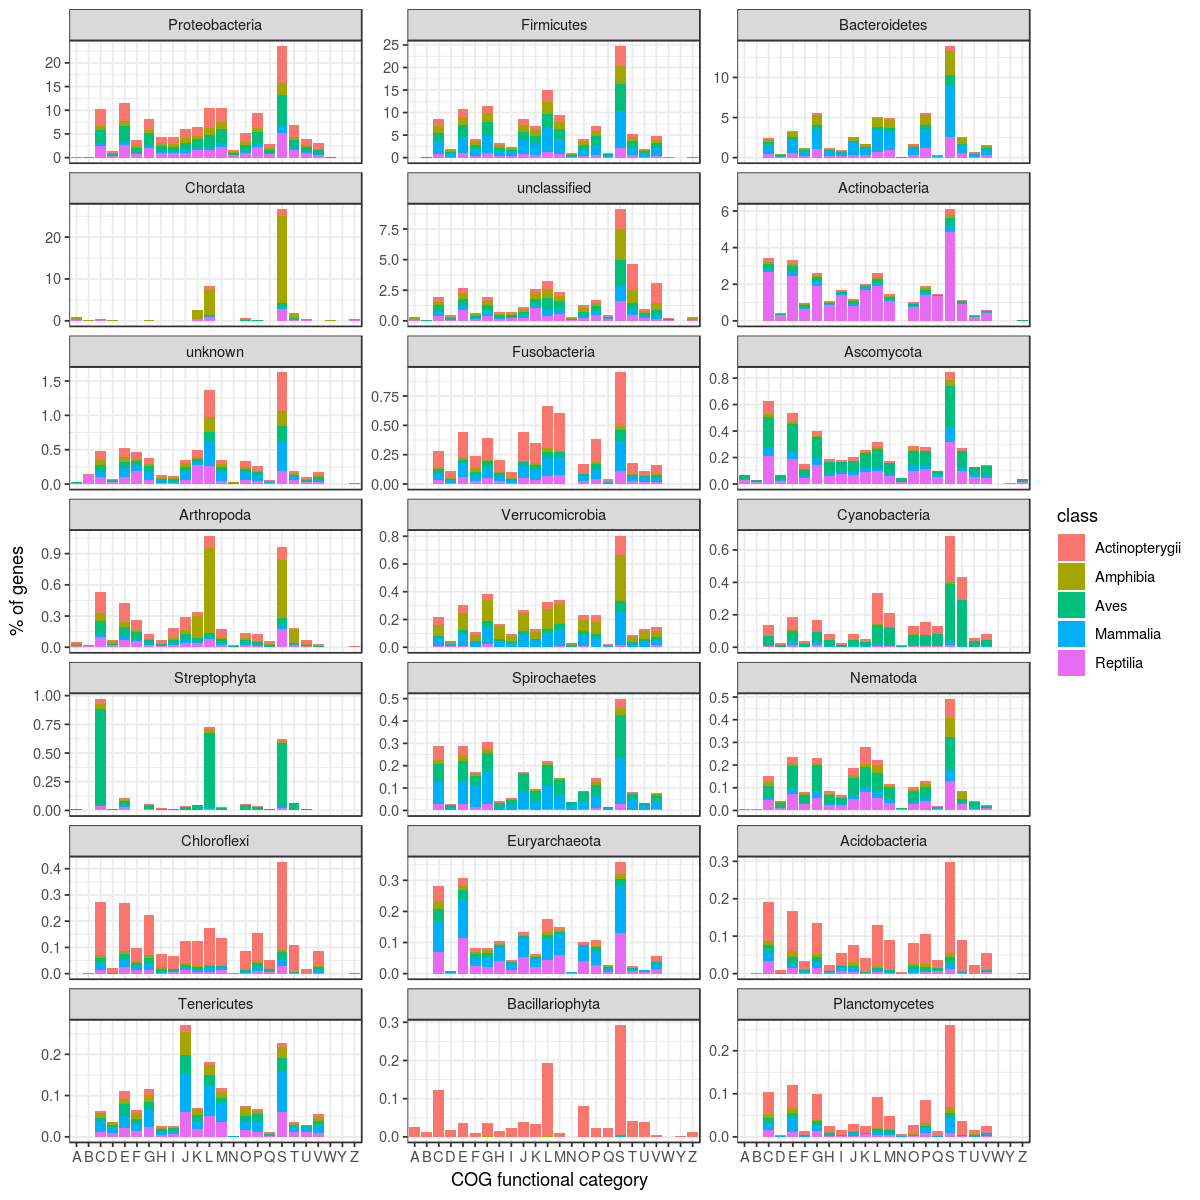

In [74]:
# plotting summary by phylum
p = emap_annot_s_s %>%
    group_by(Phylum) %>%
    mutate(perc_by_phylum = sum(perc)) %>%
    ungroup() %>%
    filter(perc_by_phylum >= 1) %>%
    mutate(Phylum = Phylum %>% as.character,
           Phylum = ifelse(is.na(Phylum), 'unclassified', Phylum),
           Phylum = Phylum %>% reorder(-perc_by_phylum)) %>%
    ggplot(aes(COG_func_cat, perc, fill=class)) +
    geom_bar(stat='identity') +
    facet_wrap(~ Phylum, scales='free_y', ncol=3) +
    labs(x='COG functional category', y='% of genes') +
    theme_bw()

dims(10,10)
plot(p)

## humann2 db genes

In [85]:
read_humann2 = function(D, base_dir){
    # reading in eggnog-mapper annotations
    ## WARING: slow
    F = file.path(base_dir, D, 'LLMGAG', 'humann2_db', 'clusters_rep-seqs_annot-index.tsv')
 
    coln = c('seqID', 'taxID', 'rank', 'spp', 'lineage')
    levs = c('Domain', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species')
    df = fread(F, sep='\t', header=TRUE) %>%
        separate(new_name, c('UniRefID', 'Gene_length', 'Taxonomy'), sep='\\|') %>%
        separate(Taxonomy, c('Genus', 'Species'), sep='\\.s__') %>%
        separate(Species, c('Species', 'TaxID'), sep='__taxID') %>%
        mutate(Genus = gsub('^g__', '', Genus))
    df$D = D
    df = df %>%
        mutate(D = case_when(
            D == "MG_assembly_act" ~ 'Actinopterygii',
            D == "MG_assembly_amp" ~ 'Amphibia',
            D == "MG_assembly_rep" ~ 'Reptilia',
            D == "MG_assembly_ave" ~ 'Aves',
            D == "MG_assembly_mam" ~ 'Mammalia'
        ))
    return(df)
}

doParallel::registerDoParallel(threads)
hm2 = plyr::llply(as.list(out_dirs), read_humann2, base_dir=base_out_dir, .parallel=TRUE) %>%
    do.call(rbind, .)
hm2 %>% dfhead

[1] 4581925       7


original_name,UniRefID,Gene_length,Genus,Species,TaxID,D
645a9ed02f8a44a1a03a476576fb8144,UniRef50_X4YXW5,123,Propionivibrio,Propionivibrio_dicarboxylicus,83767,Actinopterygii
a442d626ebc74e498b57ce0172693e7f,UniRef50_A0A023RQ62,342,unclassified,unclassified,1919227,Actinopterygii
080ead5014084676a8b59c8fc126d281,UniRef50_F0SXS8,460,Desulfitobacterium,Desulfitobacterium_dichloroeliminans,871963,Actinopterygii


In [86]:
# adding taxonomy
intersect(hm2$original_name, tax$seqID) %>% length %>% print

hm2 = hm2 %>%
    left_join(tax, c('original_name'='seqID', 'D'='D'))

hm2 %>% dfhead

[1] 4581925
[1] 4581925      17


original_name,UniRefID,Gene_length,Genus.x,Species.x,TaxID,D,taxID,rank,spp,Domain,Phylum,Class,Order,Family,Genus.y,Species.y
645a9ed02f8a44a1a03a476576fb8144,UniRef50_X4YXW5,123,Propionivibrio,Propionivibrio_dicarboxylicus,83767,Actinopterygii,83767,species,Propionivibrio dicarboxylicus,unknown,Proteobacteria,Betaproteobacteria,Rhodocyclales,Rhodocyclaceae,Propionivibrio,Propionivibrio dicarboxylicus
a442d626ebc74e498b57ce0172693e7f,UniRef50_A0A023RQ62,342,unclassified,unclassified,1919227,Actinopterygii,1919227,species,Proteobacteria bacterium SW_6_67_9,unknown,Proteobacteria,unknown,unknown,unknown,unknown,Proteobacteria bacterium SW_6_67_9
080ead5014084676a8b59c8fc126d281,UniRef50_F0SXS8,460,Desulfitobacterium,Desulfitobacterium_dichloroeliminans,871963,Actinopterygii,871963,no rank,Desulfitobacterium dichloroeliminans LMG P-21439,unknown,Firmicutes,Clostridia,Clostridiales,Peptococcaceae,Desulfitobacterium,Desulfitobacterium dichloroeliminans


### Summary

In [87]:
# number of unique UniRef IDs
hm2$UniRefID %>% unique %>% length

[1] 569168

In [88]:
# duplicate UniRef IDs
hm2 %>%
    group_by(UniRefID) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    filter(n > 1) %>%
    arrange(-n) %>%
    head(n=30)

UniRefID,n
UniRef50_G7PZX1,13598
UniRef50_Q4YFP1,6222
UniRef50_G7PJK4,4903
UniRef50_G7P3W5,4805
UniRef50_L7MAZ2,4601
UniRef50_L7LYQ0,3891
UniRef50_G7P766,3765
UniRef50_D2HE90,2690
UniRef50_A0A026VVF9,2211
UniRef50_S7Q2C6,1743


In [89]:
# number of genes with a taxID
hm2_f = hm2 %>%
    filter(!is.na(TaxID))

hm2_f %>% nrow 

[1] 4219318

#### By Taxonomy

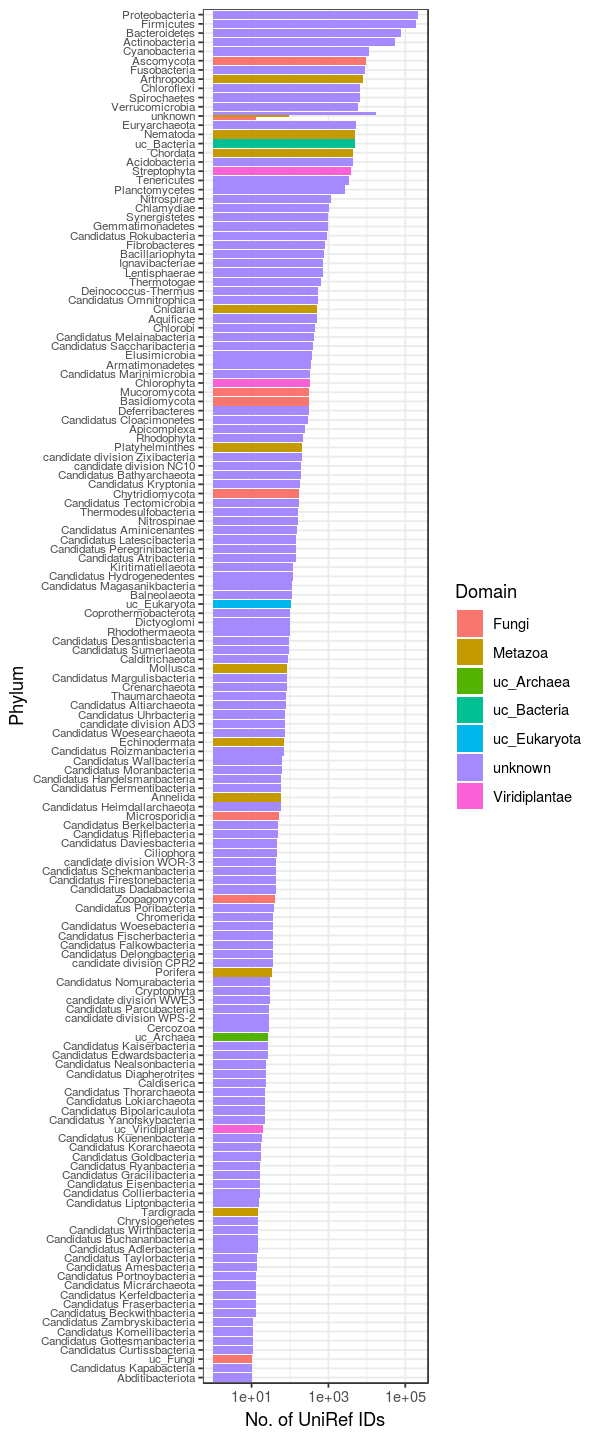

In [92]:
# number of UniRefIDs
hm2_f_s = hm2_f %>%
    group_by(Domain, Phylum) %>%
    summarize(n = UniRefID %>% unique %>% length) %>%
    ungroup()

p = hm2_f_s %>%
    filter(n >= 10) %>%
    mutate(Phylum = Phylum %>% reorder(n)) %>%
    ggplot(aes(Phylum, n, fill=Domain)) +
    geom_bar(stat='identity', position='dodge') +
    scale_y_log10() +
    coord_flip() +
    labs(y='No. of UniRef IDs') +
    theme_bw() +
    theme(
        axis.text.y = element_text(size=7)
    )
    
dims(5,12)
plot(p)

# sessionInfo

In [91]:
sessionInfo()

R version 3.4.1 (2017-06-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.2 LTS

Matrix products: default
BLAS: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRblas.so
LAPACK: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRlapack.so

locale:
[1] en_US.UTF-8

attached base packages:
[1] parallel  stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] bindrcpp_0.2.2    doParallel_1.0.11 iterators_1.0.10  foreach_1.4.4    
[5] data.table_1.11.4 ggplot2_3.0.0     tidyr_0.8.1       dplyr_0.7.6      

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.17     pillar_1.2.2     compiler_3.4.1   plyr_1.8.4      
 [5] bindr_0.1.1      base64enc_0.1-3  tools_3.4.1      digest_0.6.15   
 [9] uuid_0.1-2       jsonlite_1.5     evaluate_0.10.1  tibble_1.4.2    
[13] gtable_0.2.0     pkgconfig_2.0.1  rlang_0.2.1      IRdisplay_0.4.4 
[17] IRkernel_0.8.12  repr_0.15.0   